# Corona Virus Exploratory Analysis and Modeling 

![](https://cdn.cnn.com/cnnnext/dam/assets/200130165125-corona-virus-cdc-image-super-tease.jpg)

# 1. Import Library

In [81]:
# System
import sys
import os
import operator
import argparse
import itertools

# Time
import time
import datetime
from datetime import datetime
from time import gmtime, strftime
from pytz import timezone

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


'''
# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf
'''

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

import seaborn as sns

# from mlxtend.plotting import plot_confusion_matrix
import plotly.express as px

# from wordcloud import WordCloud

# Image
# import cv2
from PIL import Image

from IPython.display import display
from IPython.core.display import HTML


# np.random.seed(42)

%matplotlib inline

# Input data
# print(os.listdir("../input/"))

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [131]:
current_dir = os.getcwd() + "\\"
output_dir = current_dir + "output\\"
output_csv_dir = output_dir + "csv\\"
output_visualization_dir = output_dir + "visualization\\"

try:
    os.mkdir(output_dir)
except:
    print("Could not create " + output_dir)

try:
    os.mkdir(output_csv_dir)
except:
    print("Could not create " + output_csv_dir)

try:
    os.mkdir(output_visualization_dir)
except:
    print("Could not create " + output_visualization_dir)

Could not create C:\Users\Andromeda\Programming\GitHub\COVID-19\Code and Analysis\output\


### Time of last edit

In [106]:
def print_time():
    fmt = "%a, %d %B %Y %H:%M:%S %Z%z"
    
    pacific = timezone('US/Pacific')
    
    loc_dt = datetime.now(pacific)
    
    time_str = loc_dt.strftime(fmt)
    
    print("Pacific Time" + " : " + time_str)
    
    return time_str
    

In [107]:
def format_date_columns(data_cols):
    data_cols_new_format = []
    data_cols_map = {}
    
    for d in data_cols:
        new_d = datetime.strftime(datetime.strptime(d, '%m/%d/%y'),'%b %d')
        data_cols_map[d] = new_d
        data_cols_new_format.append(new_d)
    
    return data_cols_new_format, data_cols_map

In [108]:
cur_time_str = print_time()

Pacific Time : Wed, 15 April 2020 13:20:39 PDT-0700


# 2. Read Data

In [109]:
# input_dir = "../input/corona-virus-time-series-dataset/COVID-19/csse_covid_19_data/csse_covid_19_time_series/"
input_dir = "C:\\Users\\Andromeda\\Programming\\GitHub\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\"
# input_dir = "../input/novel-corona-virus-2019-dataset/"

In [110]:
os.listdir(input_dir)

['.gitignore',
 'README.md',
 'time_series_covid19_confirmed_global.csv',
 'time_series_covid19_confirmed_US.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_deaths_US.csv',
 'time_series_covid19_recovered_global.csv']

In [111]:
os.listdir("C:\\Users\\Andromeda\\Programming\\GitHub\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports_us")

['04-12-2020.csv', '04-13-2020.csv', '04-14-2020.csv', 'README.md']

In [112]:
csse_covid_19_daily_reports_us_file_location = "C:\\Users\\Andromeda\\Programming\\GitHub\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports_us\\"
csse_covid_19_daily_reports_us_latest = pd.read_csv(csse_covid_19_daily_reports_us_file_location + "04-14-2020.csv")

In [113]:
csse_covid_19_daily_reports_us_latest.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [225]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 2


figsize   = (22, 8)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)


xcol = "Province_State"
ycol = "Active"
# df[ycol] = df[ycol].map(lambda x: int(x) if x>=0)
df[ycol].
df = csse_covid_19_daily_reports_us_latest.iloc[:-1].sort_values([ycol], ascending=False)

title = ycol + " Cases by State"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df)

for p, label in zip(ax.patches, df[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + ycol.lower() + "_" + "by_state.jpg", bbox_inches="tight")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window


SyntaxError: invalid syntax (<ipython-input-225-00c3e84fb0b2>, line 20)

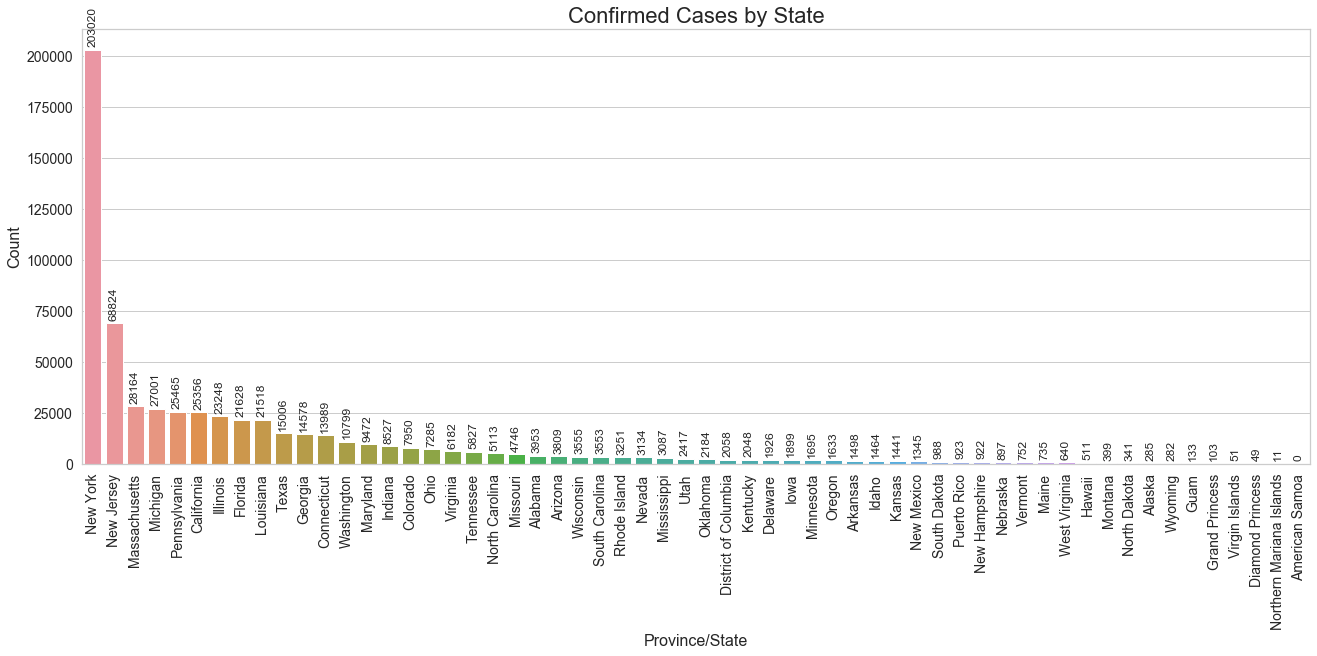

In [218]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 2


figsize   = (22, 8)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)


df = csse_covid_19_daily_reports_us_latest.iloc[:-1].sort_values(["Confirmed"], ascending=False)
xcol = "Province_State"
ycol = "Confirmed"

title = "Confirmed Cases by State"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df)

for p, label in zip(ax.patches, df[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + "confirmed_" + "by_state.jpg", bbox_inches="tight")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window


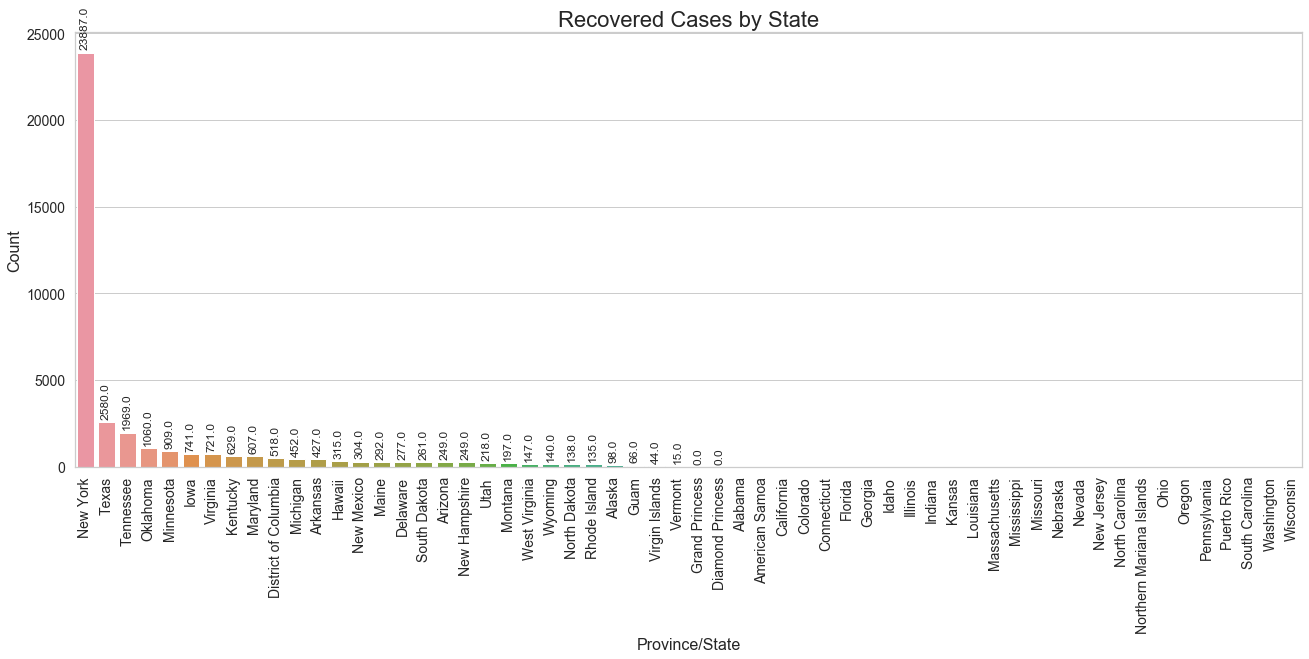

In [219]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 2


figsize   = (22, 8)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)


df = csse_covid_19_daily_reports_us_latest.iloc[:-1].sort_values(["Recovered"], ascending=False)
xcol = "Province_State"
ycol = "Recovered"

title = "Recovered Cases by State"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df)

for p, label in zip(ax.patches, df[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + "recovered_" + "by_state.jpg", bbox_inches="tight")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window


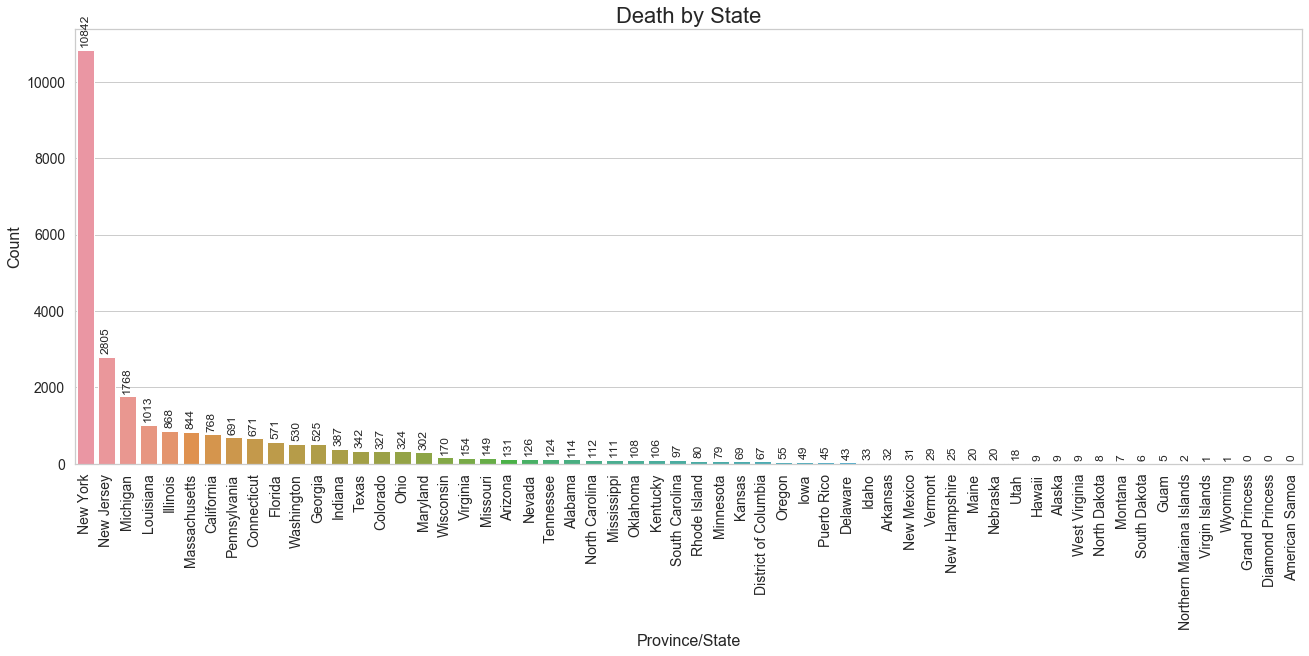

In [221]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 2


figsize   = (22, 8)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)


df = csse_covid_19_daily_reports_us_latest.iloc[:-1].sort_values(["Deaths"], ascending=False)
xcol = "Province_State"
ycol = "Deaths"

title = "Death by State"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df)

for p, label in zip(ax.patches, df[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + "death_" + "by_state.jpg", bbox_inches="tight")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window


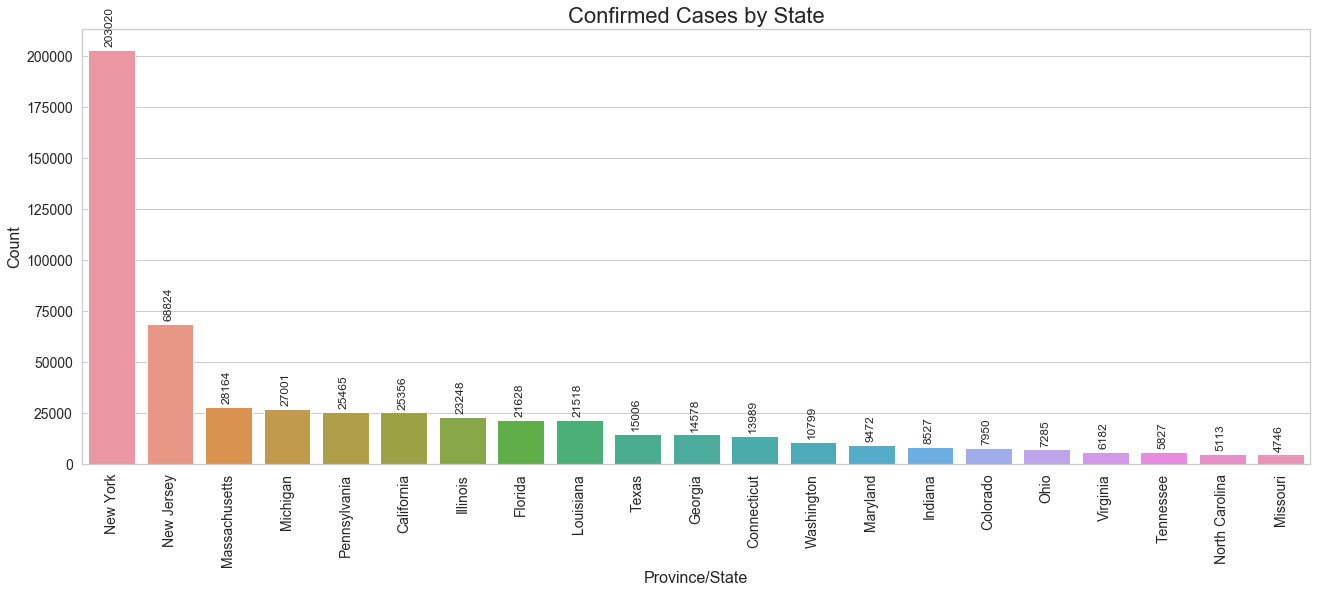

In [203]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 2


figsize   = (22, 8)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)



df_temp = df
xcol = "Province_State"
ycol = "Confirmed"

df_temp = df[df[ycol]>=4000]
title = "Confirmed Cases by State"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df_temp)

for p, label in zip(ax.patches, df_temp[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + "confirmed_" + "by_state_more_than_4000.jpg")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window

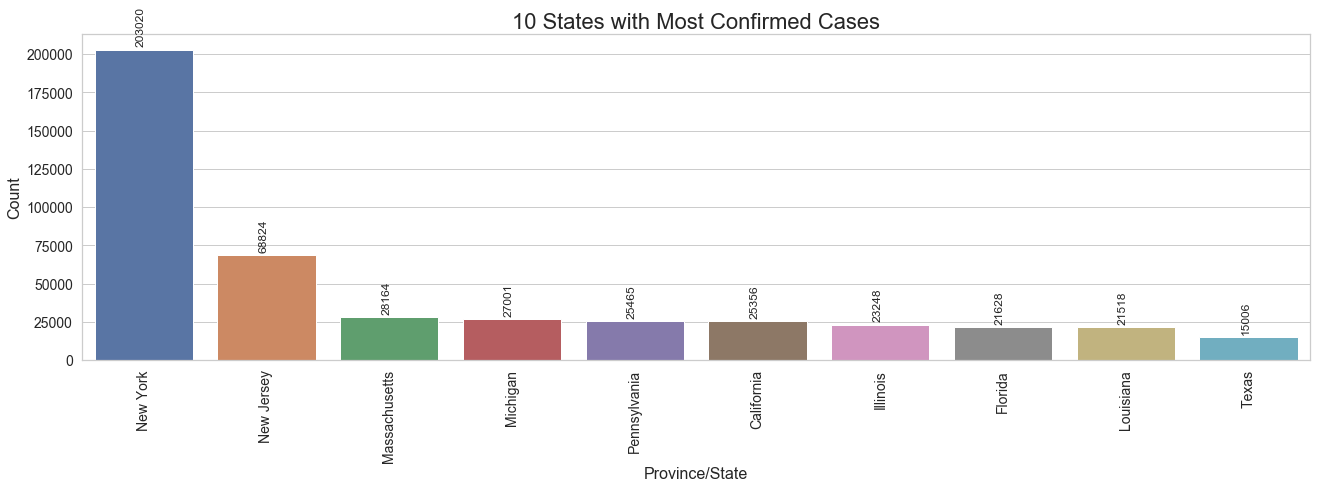

In [210]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 2


figsize   = (22, 6)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)



df_temp = df.iloc[:10]
xcol = "Province_State"
ycol = "Confirmed"

title = "10 States with Most Confirmed Cases"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df_temp)

for p, label in zip(ax.patches, df_temp[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + "confirmed_" + "top.jpg", bbox_inches="tight")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window

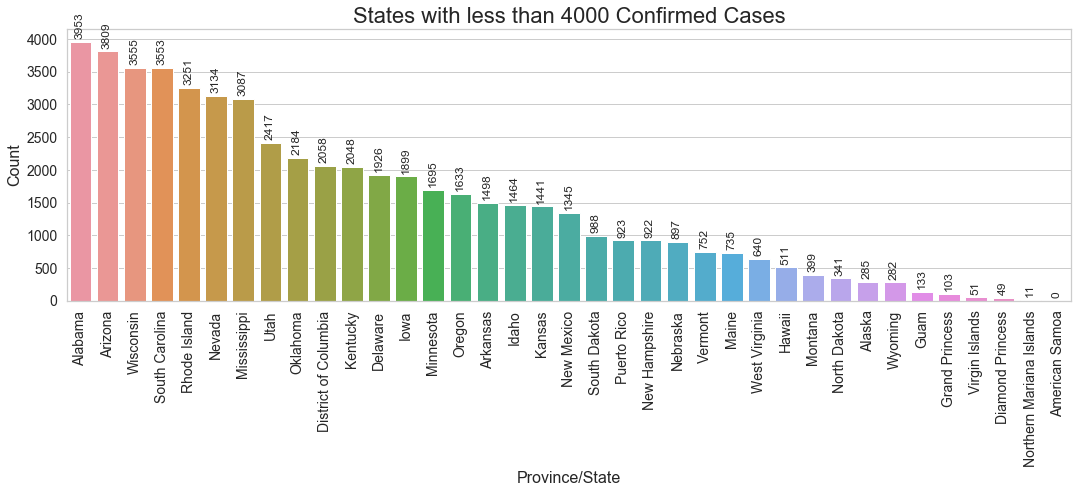

In [172]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 2


figsize   = (18, 5)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)



df_temp = df[df["Confirmed"]<=4000]
xcol = "Province_State"
ycol = "Confirmed"

title = "States with less than 4000 Confirmed Cases"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df_temp)

for p, label in zip(ax.patches, df_temp[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + "confirmed_" + "less_4000.jpg")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window

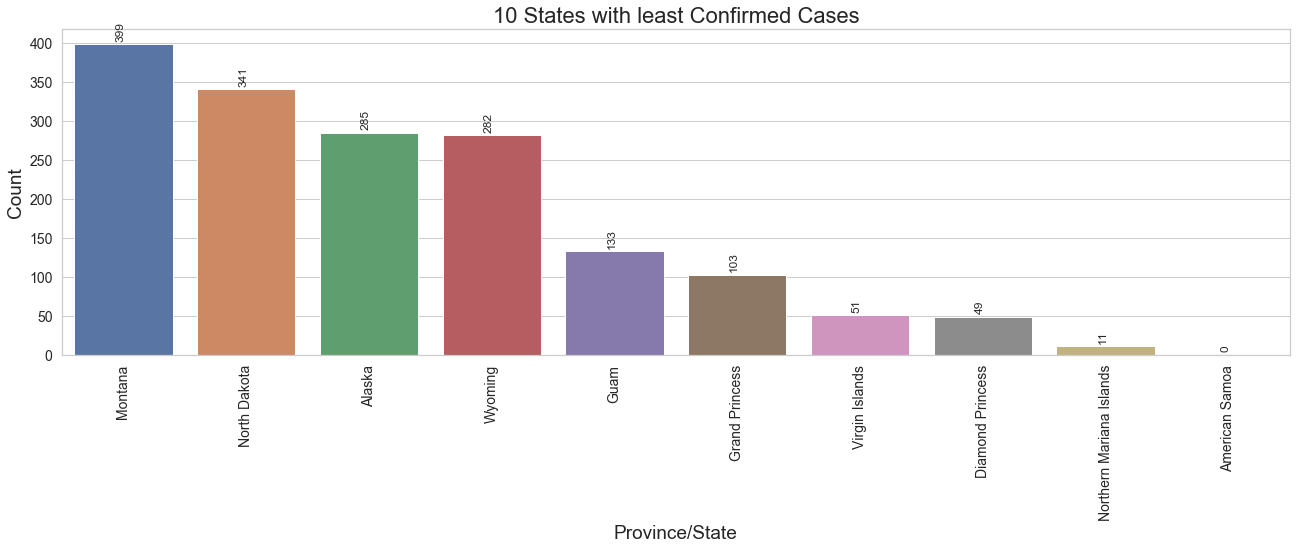

In [213]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5


figsize   = (22, 6)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)



df_temp = df.tail(10)
xcol = "Province_State"
ycol = "Confirmed"

title = "10 States with least Confirmed Cases"

xlabel   = re.sub("[^A-Za-z0-9]", "/", xcol)
ylabel   = "Count"
rotation = 90

# fig = px.bar(df, y=ycol, x=xcol, title=title)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()
ax = sns.barplot(x=xcol, y=ycol, data=df_temp)

for p, label in zip(ax.patches, df_temp[ycol]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()), rotation=90,
               xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
    
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.savefig(output_visualization_dir + "confirmed_" + "least.jpg", bbox_inches="tight")
plt.show() 
plt.clf()   # Clear figure
plt.close() # Close a figure window

In [45]:
time_series_covid19_confirmed_global = pd.read_csv(input_dir + "time_series_covid19_confirmed_global.csv")
time_series_covid19_recovered_global = pd.read_csv(input_dir + "time_series_covid19_recovered_global.csv")
time_series_covid19_deaths_global    = pd.read_csv(input_dir + "time_series_covid19_deaths_global.csv")

time_series_covid19_confirmed_US = pd.read_csv(input_dir + "time_series_covid19_confirmed_US.csv")
# time_series_covid19_recovered_global = pd.read_csv(input_dir + "time_series_covid19_recovered_global.csv")
time_series_covid19_deaths_US    = pd.read_csv(input_dir + "time_series_covid19_deaths_US.csv")


# time_series_covid_19_confirmed = pd.read_csv(input_dir + "time_series_covid_19_confirmed.csv")
# time_series_covid_19_recovered = pd.read_csv(input_dir + "time_series_covid_19_recovered.csv")
# time_series_covid_19_deaths    = pd.read_csv(input_dir + "time_series_covid_19_deaths.csv")

In [17]:
time_series_covid19_confirmed_US

UID iso2 iso3  code3     FIPS      Admin2  \
0           16   AS  ASM     16     60.0         NaN   
1          316   GU  GUM    316     66.0         NaN   
2          580   MP  MNP    580     69.0         NaN   
3          630   PR  PRI    630     72.0         NaN   
4          850   VI  VIR    850     78.0         NaN   
...        ...  ...  ...    ...      ...         ...   
3248  84090053   US  USA    840  90053.0  Unassigned   
3249  84090054   US  USA    840  90054.0  Unassigned   
3250  84090055   US  USA    840  90055.0  Unassigned   
3251  84090056   US  USA    840  90056.0  Unassigned   
3252  84099999   US  USA    840  99999.0         NaN   

                Province_State Country_Region      Lat     Long_  ... 4/3/20  \
0               American Samoa             US -14.2710 -170.1320  ...      0   
1                         Guam             US  13.4443  144.7937  ...     84   
2     Northern Mariana Islands             US  15.0979  145.6739  ...      6   
3                  Puerto Rico             US  18.2208  -66.5901  ...    316   
4               Virgin Islands             US  18.3358  -64.8963  ...     37   
...                        ...            ...      ...       ...  ...    ...   
3248                Washington             US   0.0000    0.0000  ...    501   
3249             West Virginia             US   0.0000    0.0000  ...      0   
3250                 Wisconsin             US   0.0000    0.0000  ...      0   
3251                   Wyoming             US   0.0000    0.0000  ...      0   
3252            Grand Princess             US   0.0000    0.0000  ...    103   

      4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  \
0          0       0       0       0       0       0        0        0   
1         93     112     113     121     121     128      130      133   
2          6       6       6       6       6       6        6        6   
3        452     475     513     573     620     683      725      788   
4         40      42      43      43      45      45       50       51   
...      ...     ...     ...     ...     ...     ...      ...      ...   
3248     483     533     648     677     915     838      908      848   
3249       0       0       0       0      21       0        0        0   
3250       0       0       0       0       0       0        0        0   
3251       0       0       0       0       0       0        0        0   
3252     103     103     103     103     103     103      103      103   

      4/12/20  
0           0  
1         133  
2           6  
3         897  
4          51  
...       ...  
3248      732  
3249        0  
3250        0  
3251        0  
3252      103  

[3253 rows x 93 columns]

In [25]:
time_series_covid19_confirmed_global_country = time_series_covid19_confirmed_global.groupby("Country/Region").sum().reset_index()
time_series_covid19_recovered_global_country = time_series_covid19_recovered_global.groupby("Country/Region").sum().reset_index()
time_series_covid19_deaths_global_country = time_series_covid19_deaths_global.groupby("Country/Region").sum().reset_index()
len(time_series_covid19_confirmed_global)

264

In [26]:
time_series_covid19_confirmed_global_country.drop(columns=["Lat", "Long"], inplace=True)
time_series_covid19_recovered_global_country.drop(columns=["Lat", "Long"], inplace=True)
time_series_covid19_deaths_global_country.drop(columns=["Lat", "Long"], inplace=True)

# 3. Data Preprocessing

In [27]:
columns = time_series_covid19_confirmed_global.columns.tolist()
location_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
location_long_lat_columns = ['Lat', 'Long']
location_name_cols = ['Country/Region', 'Province/State']

data_cols = [c for c in columns if c not in location_columns]

count_days = len(data_cols)

Change date format to string

In [28]:
data_cols_new_format, data_cols_map = format_date_columns(data_cols)

data_cols_new_format = data_cols

last_day = data_cols_new_format[-1]
prev_day = data_cols_new_format[-2]

new_cols = location_name_cols + [last_day]

In [29]:
# time_series_covid19_confirmed_global.rename(columns=data_cols_map, inplace=True)
# time_series_covid19_recovered_global.rename(columns=data_cols_map, inplace=True)
# time_series_covid19_deaths_global.rename(columns=data_cols_map, inplace=True)

In [38]:
import plotly.express as px

output_dir = "output\\"
output_csv_dir = output_dir + "csv\\"
output_visualization_dir = output_dir + "visualization\\"

try:
    os.mkdir(output_dir)
except:
    print("Could not create" + output_dir)

try:
    os.mkdir(output_csv_dir)
except:
    print("Could not create" + output_csv_dir)

try:
    os.mkdir(output_visualization_dir)
except:
    print("Could not create" + output_visualization_dir)

for index, row in time_series_covid19_confirmed_global_country.iterrows():
#     sns.lineplot(time_series_covid19_confirmed_global_country[data_cols_new_format])
    fig = px.line(x=data_cols_new_format, y=row[data_cols_new_format], title=row["Country/Region"])
    fig.show()
    fig.write_image(output_visualization_dir+"Confirm_"+row["Country/Region"]+".svg")
#     plt.savefig(output_visualization_dir+"Confirm_"+row["Country/Region"]+".jpg", dpi=None, facecolor='w', edgecolor='w',
#                 orientation='portrait', transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)

Could not createoutput\
Could not createoutput\csv\
Could not createoutput\visualization\


OSError: [Errno 22] Invalid argument: 'output\\visualization\\Confirm_Taiwan*.svg'

In [ ]:
def time_series_data(df=None, data_cols=None):
    series_data = {}
    
    series_data["Original"] = df[data_cols]
    
    series_data["Add"] = df[data_cols].sum().copy()
    series_data["Add"][data_cols] = series_data["Add"][data_cols].astype(int)

    series_data["Mul"] = df[data_cols].sum().copy()
    series_data["Mul"][data_cols] = series_data["Mul"][data_cols].astype(float)

    for i in range(count_days - 1, 0, -1):    
        series_data["Add"][data_cols[i]] = series_data["Add"][data_cols[i]] - series_data["Add"][data_cols[i - 1]]
        series_data["Mul"][data_cols[i]] = series_data["Mul"][data_cols[i]] / series_data["Mul"][data_cols[i - 1]]

    series_data["Percent Inc"] = series_data["Mul"] * 100 - 100

    series_data["Inc"] = series_data["Add"].copy()
    series_data["Inc"][data_cols] = series_data["Inc"][data_cols].astype(float)

    for i in range(count_days - 1, 0, -1):    
        series_data["Inc"][data_cols[i]] = series_data["Inc"][data_cols[i]] / series_data["Inc"][data_cols[i - 1]]
        
    return series_data

def time_series_data_main(df_confirmed=None, df_recovered=None, df_death=None, data_cols=None):
    series_data_main = {}
    
    series_data_main["Confirmed"] = time_series_data(df=df_confirmed, data_cols=data_cols)
    series_data_main["Recovered"] = time_series_data(df=df_recovered, data_cols=data_cols)
    series_data_main["Death"]     = time_series_data(df=df_death, data_cols=data_cols)
    
    return series_data_main

In [ ]:
def total_stats(country="", state="", extra=False, df_confirmed=None, df_recovered=None, df_death=None, data_cols=None, show_stats=False):
    stats = {}
    
    if country!="Global" and country!="" and state=="":    
        df_confirmed = df_confirmed[df_confirmed["Country/Region"]==country]
        df_recovered = df_recovered[df_recovered["Country/Region"]==country]
        df_death   = df_death[df_death["Country/Region"]==country]
    elif country != "Global" and state!="":
        df_confirmed = df_confirmed[df_confirmed["Province/State"]==state]
        df_recovered = df_recovered[df_recovered["Province/State"]==state]
        df_death   = df_death[df_death["Province/State"]==state]
    
    if extra==True:
        stats["Series Data"] = time_series_data_main(df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols)
    
    
    stats["Confirmed"] = df_confirmed[data_cols_new_format].sum()
    stats["Recovered"] = df_recovered[data_cols_new_format].sum()
    stats["Death"]     = df_death[data_cols_new_format].sum()
    
    stats["Confirmed"] = df_confirmed.sum()
    stats["Recovered"] = df_recovered.sum()
    stats["Death"]     = df_death.sum()
    
    stats["total_confirmed"] = df_confirmed[last_day].sum()
    stats["total_recovered"] = df_recovered[last_day].sum()
    stats["total_death"] = df_death[last_day].sum()
    
    stats["new_confirmed"] = stats["total_confirmed"] - df_confirmed[prev_day].sum()
    stats["new_recovered"] = stats["total_recovered"] - df_recovered[prev_day].sum()
    stats["new_death"] = stats["total_death"] - df_death[prev_day].sum()

    stats["total_closed"] = stats["total_recovered"] + stats["total_death"]
    stats["total_active"] = stats["total_confirmed"] - stats["total_closed"]

    stats["persistence_rate"] = (stats["total_active"] / stats["total_confirmed"]) * 100
    stats["fatality_rate"] = (stats["total_death"] / stats["total_confirmed"]) * 100
    stats["recovery_rate"] = (stats["total_recovered"] / stats["total_confirmed"]) * 100

    stats["net_fatality_rate"] = (stats["total_death"] / stats["total_closed"]) * 100
    stats["net_recovery_rate"] = (stats["total_recovered"] / stats["total_closed"]) * 100
    
    
    stats["confirmed_growth_percentile_mean"] = stats["Series Data"]["Confirmed"]["Percent Inc"][1:].mean()
    stats["confirmed_growth_percentile_std"] = stats["Series Data"]["Confirmed"]["Percent Inc"][1:].std()
    stats["confirmed_growth_mean"] = stats["Series Data"]["Confirmed"]["Inc"][1:].mean()
    stats["confirmed_growth_std"] = stats["Series Data"]["Confirmed"]["Inc"][1:].std()
    
    stats["recovered_growth_percentile_mean"] = stats["Series Data"]["Recovered"]["Percent Inc"][1:].mean()
    stats["recovered_growth_percentile_std"] = stats["Series Data"]["Recovered"]["Percent Inc"][1:].std()
    stats["recovered_growth_mean"] = stats["Series Data"]["Recovered"]["Inc"][1:].mean()
    stats["recovered_growth_std"] = stats["Series Data"]["Recovered"]["Inc"][1:].std()
    
    stats["death_growth_percentile_mean"] = stats["Series Data"]["Death"]["Percent Inc"][1:].mean()
    stats["death_growth_percentile_std"] = stats["Series Data"]["Death"]["Percent Inc"][1:].std()
    stats["death_growth_mean"] = stats["Series Data"]["Death"]["Inc"][1:].mean()
    stats["death_growth_std"] = stats["Series Data"]["Death"]["Inc"][1:].std()
 
    
    if show_stats==True:
        print(" ", state, " ", country)
        print("*"*70)
        print("*"*70)


        print(" Current")
        print("-"*70)

        print(" Total Confirmed                                    : %d" % (stats["total_confirmed"]))
        print(" Total Recovered                                    : %d" % (stats["total_recovered"]))
        print(" Total Death                                        : %d" % (stats["total_death"]))
        print("-"*70)
        print("\n")

        print(" New Cases")
        print("-"*70)

        print(" New Confirmed                                      : %d" % (stats["new_confirmed"]))
        print(" New Recovered                                      : %d" % (stats["new_recovered"]))
        print(" New Deaths                                         : %d" % (stats["new_death"]))
        print("-"*70)
        print("\n")

        print(" Other Totals")
        print("-"*70)

        print(" Total Active (Confirmed - (Recovered + Deaths))    : %d" % (stats["total_active"]))
        print(" Total Closed (Recovered + Deaths)                  : %d" % (stats["total_closed"]))
        print("-"*70)
        print("\n")

        print(" Rates/Percentiles")
        print("-"*70)
        print(" Persistence Rate (Total Active / Total Confirmed)  : %.2f" % (stats["persistence_rate"]))
        print(" Fatality Rate (Total Death / Total Confirmed)      : %.2f" % (stats["fatality_rate"]))
        print(" Recovery Rate (Total Recovered / Total Confirmed)  : %.2f" % (stats["recovery_rate"]))

        print("\n")
        print(" Net Fatality Rate (Total Death / Total Closed)     : %.2f" % (stats["net_fatality_rate"]))
        print(" Net Recovery Rate (Total Recovered / Total Closed) : %.2f" % (stats["net_recovery_rate"]))
        print("-"*70)
        print("\n\n")

        print(" Growth Factors")
        print("-"*80)
        print("\n")
        print(" Confirmed")
        print("-"*80)
        print(" Average Growth Percentile (((Current Day - Previous Day)/Previous Day) *100): %.2f" % (stats["confirmed_growth_percentile_mean"]))
        print(" Standard Deviation of Growth Percentile                                     : %.2f" % (stats["confirmed_growth_percentile_std"]))
        print(" Average Growth (Current Day / Previous Day)                                 : %.2f" % (stats["confirmed_growth_mean"]))
        print(" Standard Deviation of Growth                                                : %.2f" % (stats["confirmed_growth_std"]))
        print("-"*80)    
        print("\n")

        print(" Recovered")
        print("-"*80)
        print(" Average Growth Percentile (((Current Day - Previous Day)/Previous Day) *100): %.2f" % (stats["recovered_growth_percentile_mean"]))
        print(" Standard Deviation of Growth Percentile                                     : %.2f" % (stats["recovered_growth_percentile_std"]))
        print(" Average Growth (Current Day / Previous Day)                                 : %.2f" % (stats["recovered_growth_mean"]))
        print(" Standard Deviation of Growth                                                : %.2f" % (stats["recovered_growth_std"]))
        print("-"*80)
        print("\n")


        print(" Death")
        print("-"*80)
        print(" Average Growth Percentile (((Current Day - Previous Day)/Previous Day) *100): %.2f" % (stats["death_growth_percentile_mean"]))
        print(" Standard Deviation of Growth Percentile                                     : %.2f" % (stats["death_growth_percentile_std"]))
        print(" Average Growth (Current Day / Previous Day)                                 : %.2f" % (stats["death_growth_mean"]))
        print(" Standard Deviation of Growth                                                : %.2f" % (stats["death_growth_std"]))
        print("-"*80)

    return stats

In [ ]:
# !pip install itables
# !pip install countryinfo


import itables.interactive
from itables import show

from countryinfo import CountryInfo

In [ ]:
country_name_map = {
    "Andorra":"NA",
    "Bahamas": "The Bahamas",
    "Burma": "NA",
    "Cabo Verde": "NA",
    "Congo (Brazzaville)": "NA",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Cote d'Ivoire": "NA",
    "Czechia": "NA",
    "Diamond Princess": "NA",
    "Eswatini": "NA",
    "Gambia": "The Gambia",
    "Holy See": "NA",
    "Korea, South": "South Korea",
    "Kosovo": "NA",
    "Montenegro": "NA",
    "North Macedonia": "NA",
    "Serbia": "NA",
    "Taiwan*": "Taiwan",
    "Timor-Leste": "NA",
    "US": "united states",
    "West Bank and Gaza": "NA"}

In [ ]:
def country_info(country, property_name):
    
    if country not in country_name_map:
        try:
            return CountryInfo(country).info()[property_name]
        except:
            return "NA"
    elif country_name_map[country]!="NA":
        return CountryInfo(country_name_map[country]).info()[property_name]
    else:
        return "NA"

In [ ]:
def add_property(df):
    new_df = df.copy()
    
    new_df["Region"] = new_df["Country/Region"].apply(lambda x: country_info(x, "region"))
    print("aaaa")
    new_df["Subregion"] = new_df["Country/Region"].apply(lambda x: country_info(x, "subregion"))
    new_df["Population"] = new_df["Country/Region"].apply(lambda x: country_info(x, "population"))
    new_df["Area"] = new_df["Country/Region"].apply(lambda x: country_info(x, "area"))
    # new_df["Timezones"] = new_df["Country/Region"].apply(lambda x: country_info(x, "timezones"))
    # new_df["Currencies"] = new_df["Country/Region"].apply(lambda x: country_info(x, "currencies"))
    # new_df["Languages"] = new_df["Country/Region"].apply(lambda x: country_info(x, "languages"))
    
    cols = new_df.columns.tolist()
    new_df = new_df[[cols[1]] + [cols[0]] + cols[-4:] + cols[2:4]  + cols[4:-4]]
    
    return new_df

In [ ]:
enc = 'utf8'
time_series_covid19_confirmed_global = pd.read_csv(filepath_or_buffer=input_dir + "time_series_covid19_confirmed_global.csv", encoding=enc)

time_series_covid_19_confirmed = add_property(time_series_covid19_confirmed_global)
# time_series_covid_19_recovered = add_property(time_series_covid19_recovered_global)
# time_series_covid_19_deaths    = add_property(time_series_covid19_deaths_global)


In [ ]:
from countryinfo import CountryInfo


# coding=utf-8
from countryinfo import CountryInfo


country = CountryInfo('Singapore')
country.provinces()


country = CountryInfo('Singapore')
country.provinces()

# !pip install tensorflow==2.0

In [ ]:
# !pip install tensorflow

In [ ]:
location_columns   = ['Province/State', 'Country/Region', 'Region', 'Subregion', 'Population', 'Area', 'Lat', 'Long']
location_name_cols = ['Country/Region', 'Province/State', 'Region', 'Subregion', 'Population', 'Area']

In [ ]:
time_series_covid_19_confirmed.rename(columns=data_cols_map, inplace=True)
time_series_covid_19_recovered.rename(columns=data_cols_map, inplace=True)
time_series_covid_19_deaths.rename(columns=data_cols_map, inplace=True)

In [ ]:
time_series_covid_19_confirmed.to_csv("time_series_covid_19_confirmed_new.csv")
time_series_covid_19_recovered.to_csv("time_series_covid_19_recovered_new.csv")
time_series_covid_19_deaths.to_csv("time_series_covid_19_deaths_new.csv")

In [ ]:
country_list = time_series_covid_19_confirmed['Country/Region'].unique().tolist()
country_list.sort()

state_list = time_series_covid_19_confirmed['Province/State'].unique().tolist()
# state_list.sort()

In [ ]:
last_confirmed_df = time_series_covid_19_confirmed[location_name_cols + [last_day]].copy()
last_confirmed_df.rename(columns = {last_day: "Confirmed"}, inplace=True)

last_add_confirmed_df = time_series_covid_19_confirmed[location_name_cols + [prev_day, last_day]].copy()
last_add_confirmed_df["New Confirmed"] = last_add_confirmed_df[last_day] - last_add_confirmed_df[prev_day]
last_add_confirmed_df.drop(columns = [prev_day, last_day], inplace=True)

last_recovered_df = time_series_covid_19_recovered[location_name_cols + [last_day]].copy()
last_recovered_df.rename(columns = {last_day: "Recovered"}, inplace=True)

last_add_recovered_df = time_series_covid_19_recovered[location_name_cols + [prev_day, last_day]].copy()
last_add_recovered_df["New Recovered"] = last_add_recovered_df[last_day] - last_add_recovered_df[prev_day]
last_add_recovered_df.drop(columns = [prev_day, last_day], inplace=True)

last_death_df = time_series_covid_19_deaths[location_name_cols + [last_day]].copy()
last_death_df.rename(columns = {last_day: "Death"}, inplace=True)

last_add_death_df = time_series_covid_19_deaths[location_name_cols + [prev_day, last_day]].copy()
last_add_death_df["New Death"] = last_add_death_df[last_day] - last_add_death_df[prev_day]
last_add_death_df.drop(columns = [prev_day, last_day], inplace=True)


In [ ]:
result1 = last_confirmed_df.merge(last_add_confirmed_df, on = location_name_cols)
result2 = result1.merge(last_recovered_df, on = location_name_cols)
result3 = result2.merge(last_add_recovered_df, on = location_name_cols)
result4 = result3.merge(last_death_df, on = location_name_cols)
result = result4.merge(last_add_death_df, on = location_name_cols)

In [ ]:
result ["Active"] = result["Confirmed"] - (result["Recovered"] + result["Death"])
result ["Closed"] = result["Recovered"] + result["Death"]

result["Persistence Rate"] = (result["Active"] / result["Confirmed"]) * 100
result["Fatality Rate"] = (result["Death"] / result["Confirmed"]) * 100
result["Recovery Rate"] = (result["Recovered"] / result["Confirmed"]) * 100

result["Net Recovery Rate"] = (result["Recovered"] / result["Closed"]) * 100
result["Net Fatality Rate"] = (result["Death"] / result["Closed"]) * 100

In [ ]:
result.to_csv("result.csv")

In [ ]:
show(result, paging=True)

In [ ]:
country_cols = ['Country/Region', 'Region', 'Subregion', 'Population', 'Area', 'Confirmed', 
                'New Confirmed', 'Recovered', 'New Recovered','Death', 'New Death', 'Active', 'Closed']

country_group_by_cols = ['Country/Region', 'Region', 'Subregion', 'Population', 'Area']


result_country = result[country_cols].groupby(country_group_by_cols).sum().reset_index()


result_country["Persistence Rate"] = (result_country["Active"] / result_country["Confirmed"]) * 100
result_country["Fatality Rate"] = (result_country["Death"] / result_country["Confirmed"]) * 100
result_country["Recovery Rate"] = (result_country["Recovered"] / result_country["Confirmed"]) * 100
result_country["Net Recovery Rate"] = (result_country["Recovered"] / result_country["Closed"]) * 100
result_country["Net Fatality Rate"] = (result_country["Death"] / result_country["Closed"]) * 100

# result_country["Confirm per Population"] = (result_country["Confirmed"] / result_country["Population"]) * 100
# result_country["Death per Population"] = (result_country["Death"] / result_country["Population"]) * 100

In [ ]:
result_country.to_csv("result_country.csv")

In [ ]:
show(result_country, paging=True)

In [ ]:
# subregion_cols = ['Region', 'Subregion', 'Population', 'Area', 'Confirmed', 'New Confirmed', 'Recovered',
#                   'New Recovered','Death', 'New Death', 'Active', 'Closed']

subregion_group_by_cols = ['Subregion']

result_subregion = result.groupby(subregion_group_by_cols).sum().reset_index()

result_subregion["Persistence Rate"] = (result_subregion["Active"] / result_subregion["Confirmed"]) * 100
result_subregion["Fatality Rate"] = (result_subregion["Death"] / result_subregion["Confirmed"]) * 100
result_subregion["Recovery Rate"] = (result_subregion["Recovered"] / result_subregion["Confirmed"]) * 100
result_subregion["Net Recovery Rate"] = (result_subregion["Recovered"] / result_subregion["Closed"]) * 100
result_subregion["Net Fatality Rate"] = (result_subregion["Death"] / result_subregion["Closed"]) * 100

In [ ]:
result_subregion.to_csv("result_subregion.csv")

In [ ]:
show(result_subregion, paging=True)

In [ ]:
# region_cols = ['Region', 'Population', 'Area', 'Confirmed', 'New Confirmed', 'Recovered',
#                   'New Recovered','Death', 'New Death', 'Active', 'Closed']

region_group_by_cols = ['Region']

result_region = result.groupby(region_group_by_cols).sum().reset_index()


result_region["Persistence Rate"] = (result_region["Active"] / result_region["Confirmed"]) * 100
result_region["Fatality Rate"] = (result_region["Death"] / result_region["Confirmed"]) * 100
result_region["Recovery Rate"] = (result_region["Recovered"] / result_region["Confirmed"]) * 100
result_region["Net Fatality Rate"] = (result_region["Death"] / result_region["Closed"]) * 100

In [ ]:
result_region.to_csv("result_region.csv")

In [ ]:
show(result_region, paging=True)

In [ ]:
df_confirmed = time_series_covid19_confirmed_global
df_recovered = time_series_covid19_recovered_global
df_death = time_series_covid19_deaths_global

data_cols = data_cols_new_format

stats_global = total_stats(country="Global", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_US = total_stats(country="US", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_Bangladesh = total_stats(country="Bangladesh", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_Italy = total_stats(country="Italy", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_Spain = total_stats(country="Spain", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_China = total_stats(country="China", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_Iran = total_stats(country="Iran", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_India = total_stats(country="India", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

In [ ]:
# stats_Pakistan = total_stats(country="Pakistan", state="", extra=True, df_confirmed=df_confirmed, df_recovered=df_recovered, df_death=df_death, data_cols=data_cols, show_stats=True)

# 4. Visualization

In [ ]:
sns.set(style="whitegrid")

ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

# ticksize  = 12
# labelsize = int(ticksize * 1.3)
# titlesize = int(labelsize * 1.3)

figsize   = (18, 5)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)



data = [stats_global["total_confirmed"], stats_global["total_active"], stats_global["total_recovered"], stats_global["total_death"]]
labels = ["Confirmed", "Active", "Recovered", "Deaths"]

title    = "Total Confimed, Active, Recovered and Deaths (Current Global)"

# xlabel   = ""
# ylabel   = "Count"
# rotation = 90


sns.barplot(x=labels, y=data)
plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.xticks(rotation=rotation)
plt.show() 
    
    

data = [stats_global["total_active"], stats_global["total_recovered"], stats_global["total_death"]]
labels = ["Active", "Recovered", "Deaths"]

title = "Active, Recovered and Deaths (Current Global)"

# xlabel   = ""
# ylabel   = "Count"
# rotation = 90


sns.barplot(x=labels, y=data)
plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.xticks(rotation=rotation)
plt.show() 
   


data = [stats_global["persistence_rate"], stats_global["recovery_rate"], stats_global["fatality_rate"]]
labels = ["Persistence Rate", "Recovery Rate", "Fatality Rate"]

title = "Current Global Persistence, Recovery, Fatality Rate (%)"

# xlabel   = ""
# ylabel   = "Count"
# rotation = 90


sns.barplot(x=labels, y=data)
plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.xticks(rotation=rotation)
plt.show()



data = [stats_global["net_recovery_rate"], stats_global["net_fatality_rate"]]
labels = ["Net Recovery Rate", "Net Fatality Rate"]

title = "Current Global Net Recovery, and Fatality Rate (%) for Closed Cases"

# xlabel   = ""
# ylabel   = "Count"
# rotation = 90


sns.barplot(x=labels, y=data)
plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.xticks(rotation=rotation)
plt.show()

In [ ]:
# time_series_covid_19_confirmed.info()
time_series_covid_19_confirmed.sort_values(["Country/Region", "Province/State"], inplace=True)
# time_series_covid_19_confirmed.fillna("NA", inplace=True)
# time_series_covid_19_confirmed.head()

In [ ]:
# time_series_covid_19_recovered.info()
time_series_covid_19_recovered.sort_values(["Country/Region", "Province/State"], inplace=True)
# time_series_covid_19_recovered.fillna("NA", inplace=True)
# time_series_covid_19_recovered.head()

In [ ]:
# time_series_covid_19_deaths.info()
time_series_covid_19_deaths.sort_values(["Country/Region", "Province/State"], inplace=True)
# time_series_covid_19_deaths.fillna("NA", inplace=True)
# time_series_covid_19_deaths.head()

In [ ]:
data_cols = data_cols_new_format

In [ ]:
confirmed_total_add = time_series_covid_19_confirmed[data_cols].sum().copy()
confirmed_total_add[data_cols] = confirmed_total_add[data_cols].astype(int)

confirmed_total_mul = time_series_covid_19_confirmed[data_cols].sum().copy()
confirmed_total_mul[data_cols] = confirmed_total_mul[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    confirmed_total_add[data_cols[i]] = confirmed_total_add[data_cols[i]] - confirmed_total_add[data_cols[i - 1]]
    confirmed_total_mul[data_cols[i]] = confirmed_total_mul[data_cols[i]] / confirmed_total_mul[data_cols[i - 1]]


confirmed_total_percent_inc = (confirmed_total_mul - 1)*100

confirmed_total_inc = confirmed_total_add.copy()
confirmed_total_inc[data_cols] = confirmed_total_inc[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    confirmed_total_inc[data_cols[i]] = confirmed_total_inc[data_cols[i]] / confirmed_total_inc[data_cols[i - 1]]

In [ ]:
confirmed_add = time_series_covid_19_confirmed[data_cols].copy()
confirmed_add[data_cols] = confirmed_add[data_cols].astype(int)

confirmed_mul = time_series_covid_19_confirmed[data_cols].sum().copy()
confirmed_mul[data_cols] = confirmed_mul[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    confirmed_add[data_cols[i]] = confirmed_add[data_cols[i]] - confirmed_add[data_cols[i - 1]]
    confirmed_mul[data_cols[i]] = confirmed_mul[data_cols[i]] / confirmed_mul[data_cols[i - 1]]


confirmed_percent_inc = (confirmed_mul - 1)*100


confirmed_inc = confirmed_total_add.copy()
confirmed_total_inc[data_cols] = confirmed_total_inc[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    confirmed_total_inc[data_cols[i]] = confirmed_total_inc[data_cols[i]] / confirmed_total_inc[data_cols[i - 1]]

In [ ]:
time_series_covid_19_confirmed_country = time_series_covid_19_confirmed.drop(columns=location_long_lat_columns)
time_series_covid_19_confirmed_country = time_series_covid_19_confirmed_country.groupby(['Country/Region']).sum()
# time_series_covid_19_confirmed_country.head()

In [ ]:
confirmed_country_add = time_series_covid_19_confirmed_country[data_cols].copy()
confirmed_country_add[data_cols] = confirmed_country_add[data_cols].astype(int)

confirmed_country_mul = time_series_covid_19_confirmed_country[data_cols].copy()
confirmed_country_mul[data_cols] = confirmed_country_mul[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    confirmed_country_add[data_cols[i]] = confirmed_country_add[data_cols[i]] - confirmed_country_add[data_cols[i - 1]]
    confirmed_country_mul[data_cols[i]] = confirmed_country_mul[data_cols[i]] / confirmed_country_mul[data_cols[i - 1]]

confirmed_country_percent_inc = (confirmed_country_mul - 1)*100

confirmed_country_inc = confirmed_country_add.copy()
confirmed_country_inc[data_cols] = confirmed_country_inc[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    confirmed_country_inc[data_cols[i]] = confirmed_country_inc[data_cols[i]] / confirmed_country_inc[data_cols[i - 1]]

In [ ]:
recovered_total_add = time_series_covid_19_recovered[data_cols].sum().copy()
recovered_total_add[data_cols] = recovered_total_add[data_cols].astype(int)

recovered_total_mul = time_series_covid_19_recovered[data_cols].sum().copy()
recovered_total_mul[data_cols] = recovered_total_mul[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    recovered_total_add[data_cols[i]] = recovered_total_add[data_cols[i]] - recovered_total_add[data_cols[i - 1]]
    recovered_total_mul[data_cols[i]] = recovered_total_mul[data_cols[i]] / recovered_total_mul[data_cols[i - 1]]


recovered_total_percent_inc = (recovered_total_mul - 1)*100

recovered_total_inc = recovered_total_add.copy()
recovered_total_inc[data_cols] = recovered_total_inc[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    recovered_total_inc[data_cols[i]] = recovered_total_inc[data_cols[i]] / recovered_total_inc[data_cols[i - 1]]

In [ ]:
time_series_covid_19_recovered_country = time_series_covid_19_recovered.drop(columns=location_long_lat_columns)
time_series_covid_19_recovered_country = time_series_covid_19_recovered_country.groupby(['Country/Region']).sum()
# time_series_covid_19_recovered_country.head()

In [ ]:
recovered_country_add = time_series_covid_19_recovered_country[data_cols].copy()
recovered_country_add[data_cols] = recovered_country_add[data_cols].astype(int)

recovered_country_mul = time_series_covid_19_recovered_country[data_cols].copy()
recovered_country_mul[data_cols] = recovered_country_mul[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    recovered_country_add[data_cols[i]] = recovered_country_add[data_cols[i]] - recovered_country_add[data_cols[i - 1]]
    recovered_country_mul[data_cols[i]] = recovered_country_mul[data_cols[i]] / recovered_country_mul[data_cols[i - 1]]


recovered_country_percent_inc = (recovered_country_mul - 1)*100

recovered_country_inc = recovered_country_add.copy()
recovered_country_inc[data_cols] = recovered_country_inc[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    recovered_country_inc[data_cols[i]] = recovered_country_inc[data_cols[i]] / recovered_country_inc[data_cols[i - 1]]

In [ ]:
death_total_add = time_series_covid_19_deaths[data_cols].sum().copy()
death_total_add[data_cols] = death_total_add[data_cols].astype(int)

death_total_mul = time_series_covid_19_deaths[data_cols].sum().copy()
death_total_mul[data_cols] = death_total_mul[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    death_total_add[data_cols[i]] = death_total_add[data_cols[i]] - death_total_add[data_cols[i - 1]]
    death_total_mul[data_cols[i]] = death_total_mul[data_cols[i]] / death_total_mul[data_cols[i - 1]]


death_total_percent_inc = (death_total_mul - 1)*100


death_total_inc = death_total_add.copy()
death_total_inc[data_cols] = death_total_inc[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    death_total_inc[data_cols[i]] = death_total_inc[data_cols[i]] / death_total_inc[data_cols[i - 1]]

In [ ]:
time_series_covid_19_deaths_country = time_series_covid_19_deaths.drop(columns=location_long_lat_columns)
time_series_covid_19_deaths_country = time_series_covid_19_deaths_country.groupby(['Country/Region']).sum()
# time_series_covid_19_deaths_country.head()

In [ ]:
death_country_add = time_series_covid_19_deaths_country[data_cols].copy()
death_country_add[data_cols] = death_country_add[data_cols].astype(int)

death_country_mul = time_series_covid_19_deaths_country[data_cols].copy()
death_country_mul[data_cols] = death_country_mul[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    death_country_add[data_cols[i]] = death_country_add[data_cols[i]] - death_country_add[data_cols[i - 1]]
    death_country_mul[data_cols[i]] = death_country_mul[data_cols[i]] / death_country_mul[data_cols[i - 1]]


death_country_percent_inc = (death_country_mul - 1)*100

death_country_inc = time_series_covid_19_deaths_country[data_cols].copy()
death_country_inc[data_cols] = death_country_inc[data_cols].astype(float)

for i in range(count_days - 1, 0, -1):    
    death_country_inc[data_cols[i]] = death_country_inc[data_cols[i]] / death_country_inc[data_cols[i - 1]]

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

# ticksize  = 12
# labelsize = int(ticksize * 1.3)
# titlesize = int(labelsize * 1.3)

figsize   = (18, 5)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)


title    = "New Confirmed Cases (Global)"

xlabel   = "Date"
ylabel   = "New Confirmed Cases"

rotation = 90

sns.lineplot(y = confirmed_total_add.values-1, x = data_cols)

plt.title(title)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xticks(rotation=rotation)

plt.show() 



title    = "Confirmed Cases Percent Increase on Each Day (Global)"

xlabel   = "Date"
ylabel   = "Percent Increase by Each Day"

rotation = 90

sns.lineplot(y=confirmed_total_percent_inc.values[1:], x=data_cols[1:])

plt.title(title)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xticks(rotation=rotation)

plt.show() 



title    = "Confirmed Cases Multiplied on Each Day (Global)"

xlabel   = "Date"
ylabel   = "Multiplied by Each Day"

rotation = 90

sns.lineplot(y=confirmed_total_mul.values[1:], x=data_cols[1:])

plt.title(title)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xticks(rotation=rotation)

plt.show() 



# title    = "New Confirmed Cases Multiplied by Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied by Each Day"
# rotation = 90

# sns.barplot(y=confirmed_total_inc.values[1:], x=data_cols[1:])
# plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.xticks(rotation=rotation)
# plt.show() 

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize   = (18, 5)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)


title    = "New Recovered Cases (Globally)"

xlabel   = "Date"
ylabel   = "New Recovered Cases"

rotation = 90


sns.lineplot(y = recovered_total_add.values, x = data_cols)

plt.title(title)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xticks(rotation=rotation)

plt.show() 



title    = "Recovered Cases Percent Increase on Each Day (Globally)"

xlabel   = "Date"
ylabel   = "Percent Increase by Each Day"

rotation = 90

sns.lineplot(y=recovered_total_percent_inc.values[1:], x=data_cols[1:])

plt.title(title)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xticks(rotation=rotation)

plt.show() 



title    = "Recovered Cases Multiplied on Each Day (Globally)"

xlabel   = "Date"
ylabel   = "Multiplied by Each Day"

rotation = 90

sns.lineplot(y=recovered_total_mul.values[1:], x=data_cols[1:])

plt.title(title)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xticks(rotation=rotation)

plt.show() 



# title    = "New Recovered Cases Multiplied by Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied by Each Day"
# rotation = 90

# sns.barplot(y=recovered_total_inc.values[1:], x=data_cols[1:])
# plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.xticks(rotation=rotation)
# plt.show() 

In [ ]:
sns.set(style="whitegrid")

ticksize  = 14
labelsize = int(ticksize * 1.3)
titlesize = int(labelsize * 1.3)

figsize   = (18, 5)
params    = {'figure.figsize' : figsize,
             'axes.labelsize' : labelsize,
             'axes.titlesize' : titlesize,
             'xtick.labelsize': ticksize,
             'ytick.labelsize': ticksize}

plt.rcParams.update(params)


title    = "New Deaths (Global)"
xlabel   = "Date"
ylabel   = "New Deaths"
rotation = 90

sns.lineplot(y = death_total_add.values, x = data_cols)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.show() 



title    = "Deaths Percent Increase on Each Day  (Globally)"
xlabel   = "Date"
ylabel   = "Percent Increase on Each Day"
rotation = 90

sns.lineplot(y=death_total_percent_inc.values[1:], x=data_cols[1:])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.show() 



title    = "Deaths Multiplied on Each Day  (Globally)"
xlabel   = "Date"
ylabel   = "Multiplied on Each Day"
rotation = 90

sns.lineplot(y=death_total_mul.values[1:], x=data_cols[1:])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=rotation)
plt.show() 



# title    = "New Deaths Multiplied by Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied by Each Day"
# rotation = 90

# sns.barplot(y=death_total_inc.values[1:], x=data_cols[1:])
# plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.xticks(rotation=rotation)
# plt.show() 

In [ ]:
x_col = "Country/Region"
y_col = "Confirmed"
title = "Total Confirm Count"


df = result_country[[x_col, y_col]].sort_values(by=y_col, ascending=False).reset_index()
# df

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


x_col = "Country/Region"
y_col = "Confirmed"
title = "Total Confirm Count"


df = result_country[[x_col, y_col]].sort_values(by=y_col, ascending=False).reset_index()


max_count = 10
sns.barplot(x=x_col, y=y_col, data=df[:max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 




start = max_count - 1
max_count = 30

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: ])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


x_col = "Country/Region"
y_col = "Recovered"
title = "Recovered Count"


df = result_country[[x_col, y_col]].sort_values(by=y_col, ascending=False).reset_index()


max_count = 5
sns.barplot(x=x_col, y=y_col, data=df[:max_count])
plt.title(title)
# plt.xticks(rotation=90)
plt.show() 




start = max_count - 1
max_count = 25

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
# plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: ])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


x_col = "Country/Region"
y_col = "Death"
title = "Death Count"


df = result_country[[x_col, y_col]].sort_values(by=y_col, ascending=False).reset_index()


max_count = 10
sns.barplot(x=x_col, y=y_col, data=df[:max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 




start = 1
max_count = 15

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 30

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: ])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


x_col = "Country/Region"
y_col = "Fatality Rate"
title = "Fatality Rate"


df = result_country[[x_col, y_col]].sort_values(by=y_col, ascending=False).reset_index()


max_count = 10
sns.barplot(x=x_col, y=y_col, data=df[:max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 




start = max_count - 1
max_count = 20

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
# plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: ])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


# start = start + max_count - 1
# max_count = 50

# sns.barplot(x=x_col, y=y_col, data=df[start: ])
# plt.title(title)
# plt.xticks(rotation=90)
# plt.show() 

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


x_col = "Country/Region"
y_col = "Recovery Rate"
title = "Recovery Rate"


df = result_country[[x_col, y_col]].sort_values(by=y_col, ascending=False).reset_index()


max_count = 10
sns.barplot(x=x_col, y=y_col, data=df[:max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 




start = max_count - 1
max_count = 25

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: start + max_count])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 


start = start + max_count - 1
max_count = 50

sns.barplot(x=x_col, y=y_col, data=df[start: ])
plt.title(title)
plt.xticks(rotation=90)
plt.show() 

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


count_days_vis = {len(data_cols): "line", 30: "line", 15: "bar", 7: "bar", 3: "bar"}

df = time_series_covid_19_confirmed
title_key = " Confirmed "
title_text = "Total Number of" + title_key + "("


for count_days_now in count_days_vis:
    title = title_text + str(count_days_now) + " days)" 
    df[data_cols[-count_days_now:]].sum().plot(kind=count_days_vis[count_days_now])
    plt.title(title)
    plt.show()

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


count_days_vis = {len(data_cols): "line", 30: "line", 15: "bar", 7: "bar", 3: "bar"}

df = time_series_covid_19_recovered
title_key = " Recovered "
title_text = "Total Number of" + title_key + "("


for count_days_now in count_days_vis:
    title = title_text + str(count_days_now) + " days)" 
    df[data_cols[-count_days_now:]].sum().plot(kind=count_days_vis[count_days_now])
    plt.title(title)
    plt.show()

In [ ]:
sns.set(style="whitegrid")

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

count_days_vis = {len(data_cols): "line", 30: "line", 15: "bar", 7: "bar", 3: "bar"}


df = time_series_covid_19_deaths
title_key = " Deaths "
title_text = "Total Number of" + title_key + "("


for count_days_now in count_days_vis:
    title = title_text + str(count_days_now) + " days)" 
    df[data_cols[-count_days_now:]].sum().plot(kind=count_days_vis[count_days_now])
    plt.title(title)
    plt.show()

In [ ]:
# sns.set(style="whitegrid")

# ticksize = 18
# titlesize = ticksize + 8
# labelsize = ticksize + 5

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "New Confirmed Cases"
# xlabel   = "Date"
# ylabel   = "New Confirmed Cases"
# rotation = 90


# for index, row in confirmed_country_add.iterrows():
#     sns.barplot(y = row[data_cols].values, x = data_cols)
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 


In [ ]:
# sns.set(style="whitegrid")

# ticksize = 18
# titlesize = ticksize + 8
# labelsize = ticksize + 5

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "Confirmed Cases Multiplied by Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied by Each Day"
# rotation = 90


# for index, row in confirmed_country_mul.iterrows():
#     sns.barplot(y = row[data_cols].values[1:], x = data_cols[1:])
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 

In [ ]:
# sns.set(style="whitegrid")

# ticksize  = 12
# labelsize = int(ticksize * 1.3)
# titlesize = int(labelsize * 1.3)

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "New Confirmed Cases Multiplied by Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied by Each Day"
# rotation = 90


# for index, row in confirmed_country_inc.iterrows():
#     sns.barplot(y = row[data_cols].values[1:], x = data_cols[1:])
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 

In [ ]:
# sns.set(style="whitegrid")

# ticksize = 18
# titlesize = ticksize + 8
# labelsize = ticksize + 5

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "New Recovered Cases"
# xlabel   = "Date"
# ylabel   = "New Recovered Cases"
# rotation = 90


# for index, row in recovered_country_add.iterrows():
#     sns.barplot(y = row[data_cols].values, x = data_cols)
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 


In [ ]:
# sns.set(style="whitegrid")

# ticksize = 18
# titlesize = ticksize + 8
# labelsize = ticksize + 5

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "Recovered Cases Multiplied on Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied on Each Day"
# rotation = 90


# for index, row in recovered_country_mul.iterrows():
#     sns.barplot(y = row[data_cols].values[1:], x = data_cols[1:])
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 

In [ ]:
# sns.set(style="whitegrid")

# ticksize  = 12
# labelsize = int(ticksize * 1.3)
# titlesize = int(labelsize * 1.3)

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "New Recovered Cases Multiplied by Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied by Each Day"
# rotation = 90


# for index, row in recovered_country_inc.iterrows():
#     sns.barplot(y = row[data_cols].values[1:], x = data_cols[1:])
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 

In [ ]:
# sns.set(style="whitegrid")

# ticksize = 18
# titlesize = ticksize + 8
# labelsize = ticksize + 5

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "New Deaths"
# xlabel   = "Date"
# ylabel   = "New Deaths"
# rotation = 90


# for index, row in death_country_add.iterrows():
#     sns.barplot(y = row[data_cols].values, x = data_cols)
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 


In [ ]:
# sns.set(style="whitegrid")

# ticksize = 18
# titlesize = ticksize + 8
# labelsize = ticksize + 5

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "Deaths Multiplied on Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied on Each Day"
# rotation = 90


# for index, row in death_country_mul.iterrows():
#     sns.barplot(y = row[data_cols].values[1:], x = data_cols[1:])
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 

In [ ]:
# sns.set(style="whitegrid")

# ticksize  = 12
# labelsize = int(ticksize * 1.3)
# titlesize = int(labelsize * 1.3)

# figsize   = (18, 5)
# params    = {'figure.figsize' : figsize,
#              'axes.labelsize' : labelsize,
#              'axes.titlesize' : titlesize,
#              'xtick.labelsize': ticksize,
#              'ytick.labelsize': ticksize}

# plt.rcParams.update(params)


# title    = "New Death Multiplied by Each Day"
# xlabel   = "Date"
# ylabel   = "Multiplied by Each Day"
# rotation = 90


# for index, row in death_country_inc.iterrows():
#     sns.barplot(y = row[data_cols].values[1:], x = data_cols[1:])
#     plt.title(title + " ( " + index + " )")
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     plt.show() 

In [ ]:
# time_series_covid_19_confirmed[data_cols].fillna(0, inplace=True)
# time_series_covid_19_recovered[data_cols].fillna(0, inplace=True)
# time_series_covid_19_deaths[data_cols].fillna(0, inplace=True)

In [ ]:
# from mpl_toolkits.basemap import Basemap

# plt.figure(figsize=(8, 8))
# m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
# m.bluemarble(scale=0.5);


In [ ]:
# # cities = pd.read_csv('data/california_cities.csv')

# df = time_series_covid_19_confirmed
# # Extract the data we're interested in
# lat = df['Lat'].values
# lon = df['Long'].values
# confirm_last = df[last_day].values
# # area = cities['area_total_km2'].values

In [ ]:
# # 1. Draw the map background
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution='h', 
#             lat_0=37.5, lon_0=-119,
#             width=1E6, height=1.2E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

# # 2. scatter city data, with color reflecting population
# # and size reflecting area
# m.scatter(lon, lat, latlon=True,
#           c=np.log10(population),
#           cmap='Reds', alpha=0.5)

# # 3. create colorbar and legend
# plt.colorbar(label=r'$\log_{10}({\rm population})$')
# plt.clim(3, 7)

# # make legend with dummy points
# for a in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');